# CNNs

- pay attention to the spatial locality of images
- this is done through the use of "filters"
- thus the representations learnt are spatial and bear a mapping to reality
- and are hierarchical..later layers learn features composed from the previous layers
- perhaps even approximating what the visual cortex does.

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

# reshape input data
X_train = X_train.reshape(
    X_train.shape[0], config.img_width, config.img_height, 1)
X_test = X_test.reshape(
    X_test.shape[0], config.img_width, config.img_height, 1)

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
labels = range(10)

## The idea of a filter

![inline](images/Figure-21-003.png)

![inline](images/Figure-21-005.png)

![inline](images/Figure-21-006.png)

## What is a convolution

- slide 3x3 filter across image of size 5x5
- filters must fit into image, thus output will be of smaller size, in this case 3x3
- multiply values in filter by values of pixel and add a bias: $$(w, b) \cdot (x, 1)$$

![left, fit](images/Figure-21-028.png)

Movethe filter over the original image and produce a new one

![inline](images/Figure-21-014.png)

![inline](images/Figure-21-015.png)

![left, fit](images/Figure-21-009.png)

## Downsampling via Pooling Layer

- down samples images, usually using a non-overlapping stride
- 2 common types, max-pooling and average-pooling. Former better for detecting sharp edges
- makes images smaller for manageability, and also helps in learning at the next level in the hierarchy

![left, fit](images/Figure-20-011.png)

## Channel Arithmetic

![inline](images/Figure-21-037.png)

input is (say) 26x26x6, so filters MUST have 6 channels and we have 4 new featuremaps: `Conv2D(4,(3,3))`


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [2]:
class Config:
  pass

In [4]:
config = Config()
config.first_layer_convs = 32
config.first_layer_conv_width = 3
config.first_layer_conv_height = 3
config.dropout = 0.2
config.dense_layer_size = 128
config.img_width = 28
config.img_height = 28
config.epochs = 10

In [7]:
# build model
model = Sequential()
model.add(Conv2D(32,
                 (config.first_layer_conv_width, config.first_layer_conv_height),
                 input_shape=(config.img_width, config.img_height, 1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(config.dropout))
model.add(Conv2D(64,
                 (3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(config.dropout))
model.add(Flatten())
model.add(Dense(config.dense_layer_size, activation='relu'))
model.add(Dropout(config.dropout))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

## What does this model look like?

In [ ]:
model.summary()

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

## Fitting the model!

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs,
          callbacks = callbacks,)

Epoch 1/10
1875/1875 [==============================] - 19s 6ms/step - loss: 0.1841 - accuracy: 0.9430 - val_loss: 0.0491 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0673 - accuracy: 0.9795 - val_loss: 0.0309 - val_accuracy: 0.9894
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0330 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0273 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.0314 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0273 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0228 - val_accurac

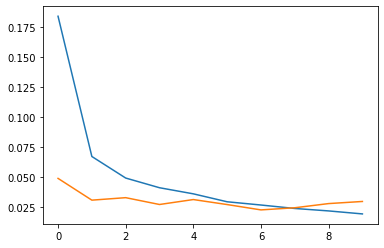

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

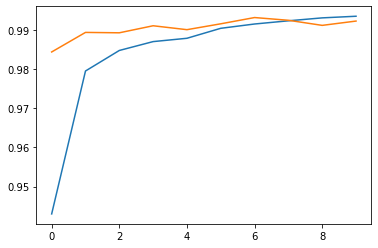

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# TODO: add code to save model
# TODO: add code to predict on new data

## Another example: VGG16

![inline](images/Figure-21-056.png)


## How do CNNs work?

![right, fit](images/Figure-21-058.png)


![inline](images/Figure-21-059.png)

![inline](images/Figure-21-060.png)



![inline](images/mv1.png)

The process of transformation of pixel data from an image by a CNN. The warping of the data is identical at different parts of the image because of the convolutional filters. At each layer, multiple new images are learned. These correspond to combinations of pixels into lines, edges and corners. Further layers combine these shapes into richer ones, such as circles. Image from Valigi and Mauro (2020).